# Description

It plot specific gene pairs from different subsets of the UpSet plot (intersections) generated before.

The idea of the notebook is to take a look at the patterns found and not found by different methods.

# Modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch.plots import jointplot
from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / f"gtex_{GTEX_TISSUE}"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood')

In [5]:
INPUT_GENE_EXPR_FILE = (
    DATASET_CONFIG["GENE_SELECTION_DIR"]
    / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_EXPR_FILE)

assert INPUT_GENE_EXPR_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_selection/gtex_v8_data_whole_blood-var_pc_log2.pkl')

In [6]:
INPUT_GENE_PAIRS_INTERSECTIONS_FILE = (
    DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
    / f"gene_pair_intersections-gtex_v8-{GTEX_TISSUE}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_PAIRS_INTERSECTIONS_FILE)

assert INPUT_GENE_PAIRS_INTERSECTIONS_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections/gene_pair_intersections-gtex_v8-whole_blood-var_pc_log2.pkl')

# Data

## Gene Ensembl ID -> Symbol mapping

In [7]:
gene_map = pd.read_pickle(
    DATASET_CONFIG["DATA_DIR"] / "gtex_gene_id_symbol_mappings.pkl"
)

In [8]:
gene_map = gene_map.set_index("gene_ens_id")["gene_symbol"].to_dict()

In [9]:
assert gene_map["ENSG00000145309.5"] == "CABS1"

## Gene expression

In [10]:
gene_expr_df = pd.read_pickle(INPUT_GENE_EXPR_FILE)

In [11]:
gene_expr_df.shape

(5000, 755)

In [12]:
gene_expr_df.head()

,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-113IC-0006-SM-5NQ9C,GTEX-113JC-0006-SM-5O997,GTEX-117XS-0005-SM-5PNU6,GTEX-117YW-0005-SM-5NQ8Z,GTEX-1192W-0005-SM-5NQBQ,GTEX-1192X-0005-SM-5NQC3,GTEX-11DXW-0006-SM-5NQ7Y,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
gene_ens_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000169429.10,0.5623,0.8067,116.90000,4.047,211.0,58.110,68.38,249.50,5.095,295.9,...,39.960,0.1393,0.22380,245.0,513.6,1626.00,0.5633,515.70,1.19400,1163.00
ENSG00000135245.9,0.6529,1.3850,199.20000,2.266,116.7,192.300,161.50,263.50,23.540,251.9,...,114.300,1.8330,0.41150,149.0,935.3,233.60,0.8882,134.00,1.12000,295.70
ENSG00000163631.16,1.8480,0.2503,0.08429,1.251,1348.0,9.971,101.30,95.09,1.264,119.3,...,2.092,2.1100,0.03588,171.8,107.1,71.25,1.7720,309.60,0.07361,17.75
ENSG00000277632.1,1.6960,1.3450,235.10000,11.770,141.7,199.100,525.50,659.90,10.910,209.3,...,61.340,2.2500,0.72310,261.2,400.0,288.50,2.6960,287.50,3.32300,618.90
ENSG00000239839.6,185.2000,1.7790,694.30000,23.840,297.3,3122.000,2521.00,1504.00,80.060,652.0,...,1010.000,253.8000,94.52000,6083.0,2768.0,52.06,34.5700,17.36,352.30000,63.85


## Gene pairs intersection

In [13]:
df_plot = pd.read_pickle(INPUT_GENE_PAIRS_INTERSECTIONS_FILE)

In [14]:
df_plot.shape

(12497500, 9)

In [15]:
df_plot.head()

Pearson (high)  Pearson (low)  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   

                                       Spearman (high)  Spearman (low)  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   

                                       Clustermatch (high)  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   

                                       Clustermatch (low)  clustermatch  \
ENSG00000000419.12 ENSG00000002834.17               False      0.418721   
                   ENSG00000002919.14               False      0.405090   
                   ENSG00000002933.7                 True      0.007466   
                   ENSG00000003402.19               False      0.391683   
                   ENSG00000004478.7                False      0.099013   

                                        pearson  spearman  
ENSG00000000419.12 ENSG00000002834.17  0.681847  0.786595  
                   ENSG00000002919.14  0.734699  0.816991  
                   ENSG00000002933.7   0.013825  0.004128  
                   ENSG00000003402.19  0.727347  0.803653  
                   ENSG00000004478.7   0.094147  0.231269

# Look at specific gene pair cases

In [16]:
# add columns with ranks
df_r_data = pd.concat(
    [
        df_plot,
        df_plot[["clustermatch", "pearson", "spearman"]]
        .rank()
        .rename(
            columns={
                "clustermatch": "clustermatch_rank",
                "pearson": "pearson_rank",
                "spearman": "spearman_rank",
            }
        ),
    ],
    axis=1,
)

In [17]:
df_r_data.head()

Pearson (high)  Pearson (low)  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   

                                       Spearman (high)  Spearman (low)  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   

                                       Clustermatch (high)  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   

                                       Clustermatch (low)  clustermatch  \
ENSG00000000419.12 ENSG00000002834.17               False      0.418721   
                   ENSG00000002919.14               False      0.405090   
                   ENSG00000002933.7                 True      0.007466   
                   ENSG00000003402.19               False      0.391683   
                   ENSG00000004478.7                False      0.099013   

                                        pearson  spearman  clustermatch_rank  \
ENSG00000000419.12 ENSG00000002834.17  0.681847  0.786595         11672987.0   
                   ENSG00000002919.14  0.734699  0.816991         11568281.0   
                   ENSG00000002933.7   0.013825  0.004128           508394.5   
                   ENSG00000003402.19  0.727347  0.803653         11457719.5   
                   ENSG00000004478.7   0.094147  0.231269          6842963.0   

                                       pearson_rank  spearman_rank  
ENSG00000000419.12 ENSG00000002834.17    11222956.0     11432918.0  
                   ENSG00000002919.14    11678806.0     11763414.0  
                   ENSG00000002933.7       510967.0        83831.0  
                   ENSG00000003402.19    11619341.0     11623217.0  
                   ENSG00000004478.7      3116619.0      4266789.0

In [18]:
df_r_data_boolean_cols = set(
    [x for x in df_r_data.columns if " (high)" in x or " (low)" in x]
)

In [19]:
df_r_data_boolean_cols

{'Clustermatch (high)',
 'Clustermatch (low)',
 'Pearson (high)',
 'Pearson (low)',
 'Spearman (high)',
 'Spearman (low)'}

In [20]:
def plot_gene_pair(top_pairs_df, idx, bins="log", plot_gene_ids=True):
    gene0, gene1 = top_pairs_df.iloc[idx].name
    display((gene0, gene1))

    gene0_symbol, gene1_symbol = gene_map[gene0], gene_map[gene1]
    display((gene0_symbol, gene1_symbol))

    _pearson, _spearman, _clustermatch = top_pairs_df.loc[
        (gene0, gene1), ["pearson", "spearman", "clustermatch"]
    ].tolist()

    # displot DOES SUPPORT HUE!
    p = sns.jointplot(
        data=gene_expr_df.T,
        x=gene0,
        y=gene1,
        kind="hex",
        bins=bins,
        # ylim=(0, 500),
    )

    gene_x_id = p.ax_joint.get_xlabel()
    gene_x_symbol = gene_map[gene_x_id]

    gene_y_id = p.ax_joint.get_ylabel()
    gene_y_symbol = gene_map[gene_y_id]

    if plot_gene_ids:
        p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")
        p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")
    else:
        p.ax_joint.set_xlabel(f"{gene_x_symbol}", fontstyle="italic")
        p.ax_joint.set_ylabel(f"{gene_y_symbol}", fontstyle="italic")

    _title = f"$c={_clustermatch:.2f}$  $r={_pearson:.2f}$    $r_s={_spearman:.2f}$"
    p.fig.suptitle(_title)

    return p

In [21]:
def get_gene_pairs(first_coef, query_set):
    assert all([x in df_r_data_boolean_cols for x in query_set])

    query = np.concatenate(
        [
            # columns that have to be true
            np.concatenate(
                [df_r_data[c].to_numpy().reshape(-1, 1) for c in query_set], axis=1
            )
            .all(axis=1)
            .reshape(-1, 1),
            # rest of the columns, that have to be false
            np.concatenate(
                [
                    ~df_r_data[c].to_numpy().reshape(-1, 1)
                    for c in df_r_data_boolean_cols
                    if c not in query_set
                ],
                axis=1,
            )
            .all(axis=1)
            .reshape(-1, 1),
        ],
        axis=1,
    ).all(axis=1)

    _tmp_df = df_r_data[query]

    # if len(second_coefs) > 1:
    #     _second_coefs_sum = _tmp_df[f"{second_coefs[0]}_rank"].add(
    #         _tmp_df[f"{second_coefs[1]}_rank"]
    #     )
    # else:
    #     _second_coefs_sum = _tmp_df[f"{second_coefs[0]}_rank"]

    # _tmp_df = _tmp_df.assign(rank_diff=_tmp_df[f"{first_coef}_rank"].sub(_second_coefs_sum))

    # show this just to make sure of the groups
    # display(_tmp_df.head())

    # # sort by rank_diff
    # _tmp_df = _tmp_df.sort_values("rank_diff", ascending=False)

    # sort by firt_coef value
    _tmp_df = _tmp_df.sort_values(first_coef, ascending=False)

    _tmp_df = _tmp_df[
        [x for x in _tmp_df.columns if "(high)" not in x and "(low)" not in x]
    ]

    return _tmp_df

In [45]:
def plot_and_save_gene_pair(data, gene0_id, gene1_id, output_file_subset):
    gene0_symbol = gene_map[gene0_id]
    gene1_symbol = gene_map[gene1_id]

    with sns.plotting_context("paper", font_scale=2.0):
        p = jointplot(
            data,
            x=gene0_id,
            y=gene1_id,
            add_corr_coefs=False,
        )

        p.ax_joint.set_xlabel(f"{gene0_symbol}", fontstyle="italic")
        p.ax_joint.set_ylabel(f"{gene1_symbol}", fontstyle="italic")

        output_file = (
            OUTPUT_FIGURE_DIR
            / f"genes-{output_file_subset}-{gene0_symbol}_vs_{gene1_symbol}.svg"
        )
        display(output_file)

        plt.savefig(
            output_file,
            bbox_inches="tight",
            dpi=300,
            facecolor="white",
        )

## Clustermatch/Spearman vs Pearson

In [23]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Spearman (high)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(9748, 6)

clustermatch   pearson  spearman  \
ENSG00000135094.10 ENSG00000111537.4       0.706993  0.090451  0.765177   
ENSG00000130208.9  ENSG00000177606.6       0.612233  0.084623  0.748265   
                   ENSG00000277632.1       0.603955  0.079032  0.736830   
                   ENSG00000135245.9       0.595734  0.097138  0.731361   
ENSG00000124216.3  ENSG00000130208.9       0.595734  0.071271  0.714580   
...                                             ...       ...       ...   
ENSG00000211667.2  ENSG00000211976.2       0.181940  0.099281  0.608162   
ENSG00000159713.10 ENSG00000182173.12      0.181940  0.095697  0.580179   
ENSG00000154760.13 ENSG00000169136.10      0.181940  0.093395  0.577616   
ENSG00000168439.16 ENSG00000211976.2       0.181940  0.046418  0.583572   
ENSG00000130827.6  ENSG00000242076.2       0.181940  0.112158  0.574640   

                                       clustermatch_rank  pearson_rank  \
ENSG00000135094.10 ENSG00000111537.4          12490598.5     3013314.0   
ENSG00000130208.9  ENSG00000177606.6          12433647.5     2846434.0   
                   ENSG00000277632.1          12423064.5     2682230.0   
                   ENSG00000135245.9          12411221.0     3199911.0   
ENSG00000124216.3  ENSG00000130208.9          12411221.0     2448712.0   
...                                                  ...           ...   
ENSG00000211667.2  ENSG00000211976.2           8771662.0     3258781.0   
ENSG00000159713.10 ENSG00000182173.12          8771662.0     3160046.0   
ENSG00000154760.13 ENSG00000169136.10          8771662.0     3095810.0   
ENSG00000168439.16 ENSG00000211976.2           8771662.0     1656489.0   
ENSG00000130827.6  ENSG00000242076.2           8771662.0     3602982.0   

                                       spearman_rank  
ENSG00000135094.10 ENSG00000111537.4      11182944.0  
ENSG00000130208.9  ENSG00000177606.6      10980346.0  
                   ENSG00000277632.1      10842098.0  
                   ENSG00000135245.9      10775394.0  
ENSG00000124216.3  ENSG00000130208.9      10570949.0  
...                                              ...  
ENSG00000211667.2  ENSG00000211976.2       9292954.0  
ENSG00000159713.10 ENSG00000182173.12      8958578.0  
ENSG00000154760.13 ENSG00000169136.10      8927829.0  
ENSG00000168439.16 ENSG00000211976.2       8999223.0  
ENSG00000130827.6  ENSG00000242076.2       8892343.0  

[9748 rows x 6 columns]

### Preview

'Index: 0'

('ENSG00000135094.10', 'ENSG00000111537.4')

('SDS', 'IFNG')

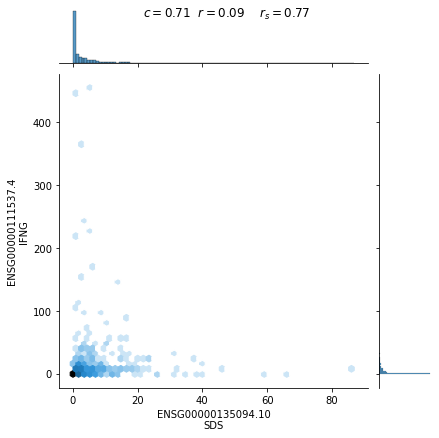

'Index: 1'

('ENSG00000130208.9', 'ENSG00000177606.6')

('APOC1', 'JUN')

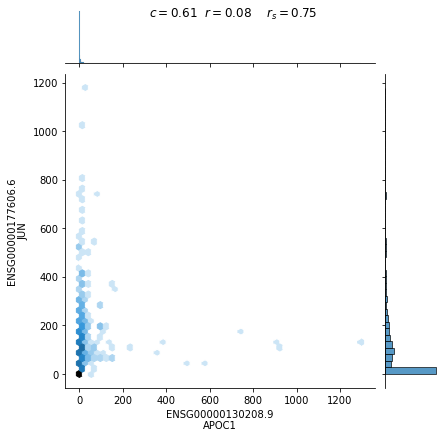

'Index: 2'

('ENSG00000130208.9', 'ENSG00000277632.1')

('APOC1', 'CCL3')

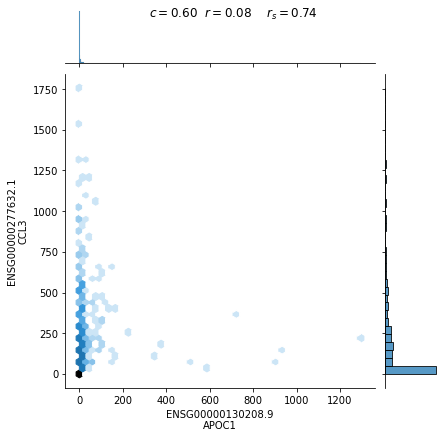

'Index: 3'

('ENSG00000130208.9', 'ENSG00000135245.9')

('APOC1', 'HILPDA')

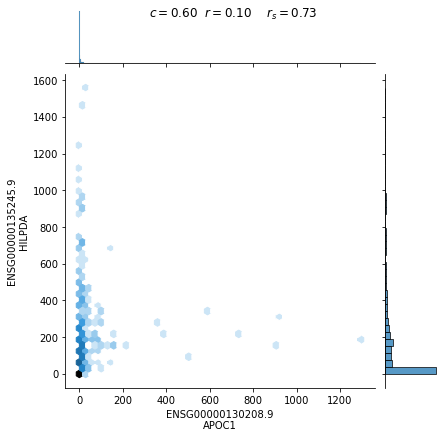

'Index: 4'

('ENSG00000124216.3', 'ENSG00000130208.9')

('SNAI1', 'APOC1')

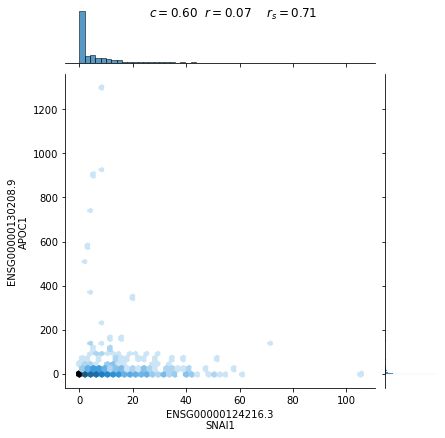

In [24]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_rs_vs_r-SDS_vs_IFNG.svg')

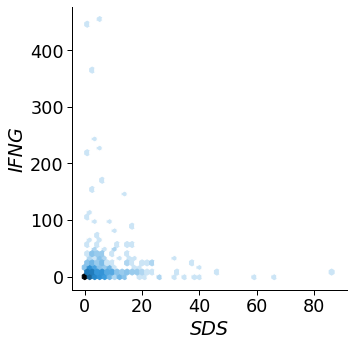

In [46]:
gene_pair_subset = "c_rs_vs_r"

gene0_id = "ENSG00000135094.10"
gene1_id = "ENSG00000111537.4"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_rs_vs_r-APOC1_vs_JUN.svg')

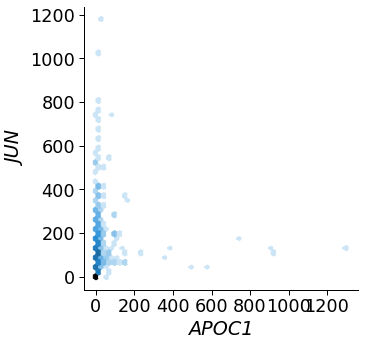

In [53]:
gene_pair_subset = "c_rs_vs_r"

gene0_id = "ENSG00000130208.9"
gene1_id = "ENSG00000177606.6"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Clustermatch vs Pearson

In [26]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(20951, 6)

clustermatch   pearson  spearman  \
ENSG00000124659.6  ENSG00000111537.4       0.468202  0.076129  0.544895   
ENSG00000236409.1  ENSG00000149257.13      0.460965  0.111842  0.540108   
ENSG00000275385.1  ENSG00000160446.18      0.446659  0.099853  0.560171   
ENSG00000236409.1  ENSG00000151929.9       0.439590  0.096174  0.502060   
ENSG00000139278.9  ENSG00000111537.4       0.439590  0.096601  0.532489   
...                                             ...       ...       ...   
ENSG00000182853.11 ENSG00000176083.17      0.181940  0.075223  0.495197   
                   ENSG00000125780.11      0.181940  0.063719  0.478540   
                   ENSG00000113905.4       0.181940  0.022184  0.495017   
                   ENSG00000105205.6       0.181940  0.038582  0.493528   
ENSG00000105486.13 ENSG00000234906.9       0.181940  0.019610  0.472049   

                                       clustermatch_rank  pearson_rank  \
ENSG00000124659.6  ENSG00000111537.4          11989835.0     2595765.0   
ENSG00000236409.1  ENSG00000149257.13         11949532.0     3594819.0   
ENSG00000275385.1  ENSG00000160446.18         11863840.5     3274368.0   
ENSG00000236409.1  ENSG00000151929.9          11817984.0     3173235.0   
ENSG00000139278.9  ENSG00000111537.4          11817984.0     3184937.0   
...                                                  ...           ...   
ENSG00000182853.11 ENSG00000176083.17          8771662.0     2568502.0   
                   ENSG00000125780.11          8771662.0     2214826.0   
                   ENSG00000113905.4           8771662.0      815462.0   
                   ENSG00000105205.6           8771662.0     1392729.0   
ENSG00000105486.13 ENSG00000234906.9           8771662.0      722578.0   

                                       spearman_rank  
ENSG00000124659.6  ENSG00000111537.4       8531829.0  
ENSG00000236409.1  ENSG00000149257.13      8473305.0  
ENSG00000275385.1  ENSG00000160446.18      8717179.0  
ENSG00000236409.1  ENSG00000151929.9       8003678.0  
ENSG00000139278.9  ENSG00000111537.4       8380146.0  
...                                              ...  
ENSG00000182853.11 ENSG00000176083.17      7918125.0  
                   ENSG00000125780.11      7708445.0  
                   ENSG00000113905.4       7915797.0  
                   ENSG00000105205.6       7897136.0  
ENSG00000105486.13 ENSG00000234906.9       7625541.0  

[20951 rows x 6 columns]

### Preview

'Index: 0'

('ENSG00000124659.6', 'ENSG00000111537.4')

('TBCC', 'IFNG')

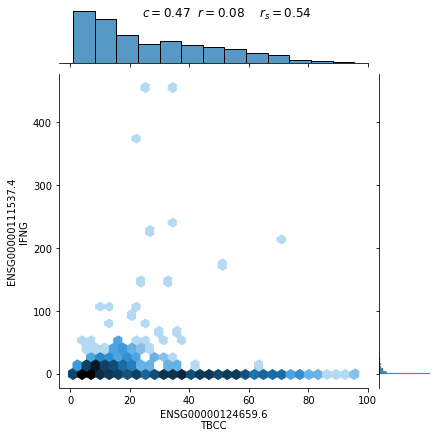

'Index: 1'

('ENSG00000236409.1', 'ENSG00000149257.13')

('NRADDP', 'SERPINH1')

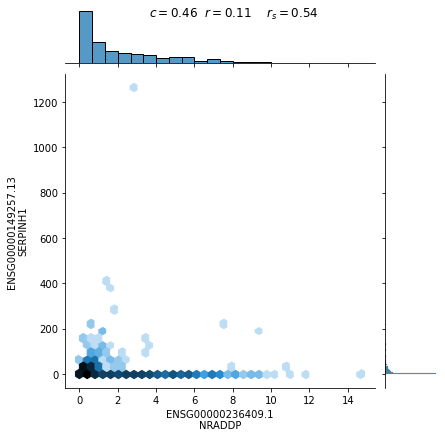

'Index: 2'

('ENSG00000275385.1', 'ENSG00000160446.18')

('CCL18', 'ZDHHC12')

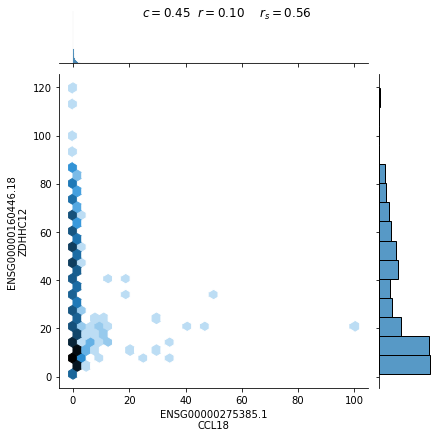

'Index: 3'

('ENSG00000236409.1', 'ENSG00000151929.9')

('NRADDP', 'BAG3')

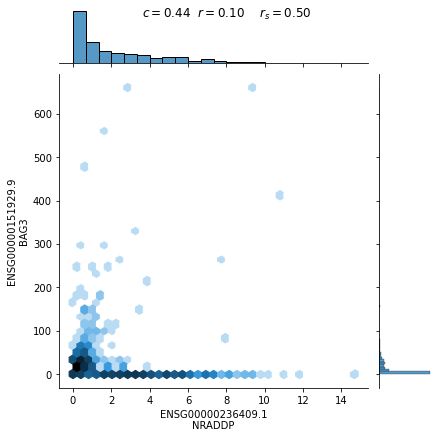

'Index: 4'

('ENSG00000139278.9', 'ENSG00000111537.4')

('GLIPR1', 'IFNG')

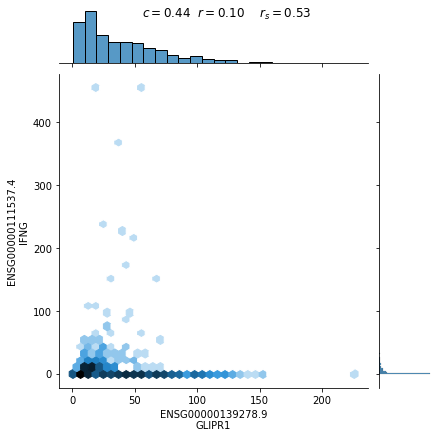

In [27]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_r-NRADDP_vs_BAG3.svg')

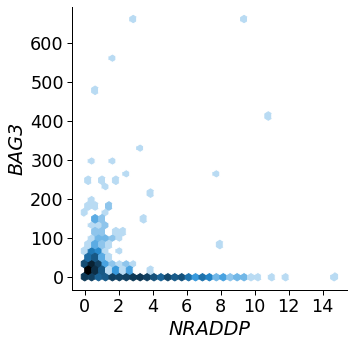

In [47]:
gene_pair_subset = "c_vs_r"

gene0_id = "ENSG00000236409.1"
gene1_id = "ENSG00000151929.9"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Clustermatch vs Spearman

In [29]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Spearman (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(28, 6)

clustermatch   pearson  spearman  \
ENSG00000147050.14 ENSG00000183878.15      0.294391  0.239870  0.100621   
ENSG00000115165.9  ENSG00000235750.9       0.205803  0.158792  0.110038   
                   ENSG00000101265.15      0.201962  0.156060  0.107882   
ENSG00000198034.10 ENSG00000099725.14      0.198590  0.361447  0.197205   
ENSG00000147050.14 ENSG00000067048.16      0.193557  0.237462  0.035350   
ENSG00000137275.13 ENSG00000100226.15      0.193464  0.171169  0.196367   
ENSG00000064666.14 ENSG00000100226.15      0.193464  0.169898  0.189400   
ENSG00000107771.15 ENSG00000174151.14      0.193464  0.211882  0.190765   
ENSG00000196663.15 ENSG00000100226.15      0.193464  0.149426  0.191243   
ENSG00000167378.8  ENSG00000174151.14      0.193464  0.195318  0.181863   
ENSG00000115165.9  ENSG00000105514.7       0.192490  0.237330  0.176075   
ENSG00000255139.1  ENSG00000101265.15      0.190994  0.165878  0.187627   
ENSG00000115165.9  ENSG00000160785.13      0.190192  0.150949  0.098379   
                   ENSG00000241878.11      0.190023  0.241985  0.182072   
ENSG00000140455.16 ENSG00000100226.15      0.188812  0.179639  0.196454   
ENSG00000142599.17 ENSG00000100226.15      0.188812  0.165703  0.194947   
ENSG00000171608.15 ENSG00000100226.15      0.188812  0.171990  0.199252   
ENSG00000107771.15 ENSG00000185905.3       0.188812  0.247591  0.199203   
ENSG00000115165.9  ENSG00000197324.8       0.184938  0.208519  0.172818   
ENSG00000129925.10 ENSG00000100226.15      0.184217  0.154006  0.181951   
ENSG00000059804.15 ENSG00000174125.7       0.184217  0.136732  0.195543   
ENSG00000167378.8  ENSG00000143412.9       0.184217  0.201746  0.189370   
ENSG00000110057.7  ENSG00000100226.15      0.184217  0.166148  0.198736   
ENSG00000198001.13 ENSG00000100226.15      0.184217  0.197282  0.195093   
ENSG00000205045.8  ENSG00000130772.13      0.184217  0.200673  0.194881   
ENSG00000005379.15 ENSG00000174151.14      0.184217  0.166414  0.181505   
ENSG00000168887.10 ENSG00000227782.2       0.181940  0.125835  0.187428   
ENSG00000107771.15 ENSG00000166272.16      0.181940  0.250624  0.198440   

                                       clustermatch_rank  pearson_rank  \
ENSG00000147050.14 ENSG00000183878.15         10436674.0     6265429.0   
ENSG00000115165.9  ENSG00000235750.9           9212181.0     4717121.0   
                   ENSG00000101265.15          9132185.0     4656609.0   
ENSG00000198034.10 ENSG00000099725.14          9071073.0     7945595.0   
ENSG00000147050.14 ENSG00000067048.16          8989374.0     6225427.0   
ENSG00000137275.13 ENSG00000100226.15          8979610.0     4982770.0   
ENSG00000064666.14 ENSG00000100226.15          8979610.0     4955926.0   
ENSG00000107771.15 ENSG00000174151.14          8979610.0     5780311.0   
ENSG00000196663.15 ENSG00000100226.15          8979610.0     4508364.0   
ENSG00000167378.8  ENSG00000174151.14          8979610.0     5469516.0   
ENSG00000115165.9  ENSG00000105514.7           8969241.0     6223245.0   
ENSG00000255139.1  ENSG00000101265.15          8909722.0     4870717.0   
ENSG00000115165.9  ENSG00000160785.13          8908908.0     4542698.0   
                   ENSG00000241878.11          8908632.5     6300106.0   
ENSG00000140455.16 ENSG00000100226.15          8897293.5     5158131.0   
ENSG00000142599.17 ENSG00000100226.15          8897293.5     4866996.0   
ENSG00000171608.15 ENSG00000100226.15          8897293.5     5000114.0   
ENSG00000107771.15 ENSG00000185905.3           8897293.5     6391744.0   
ENSG00000115165.9  ENSG00000197324.8           8824723.0     5718626.0   
ENSG00000129925.10 ENSG00000100226.15          8813629.5     4611182.0   
ENSG00000059804.15 ENSG00000174125.7           8813629.5     4213895.0   
ENSG00000167378.8  ENSG00000143412.9           8813629.5     5591743.0   
ENSG00000110057.7  ENSG00000100226.15          8813629.5     4876432.0   
ENSG00000198001.13 ENSG00000100226.15          8813629.5     5506969.0   
ENSG000002050

### Preview

'Index: 0'

('ENSG00000147050.14', 'ENSG00000183878.15')

('KDM6A', 'UTY')

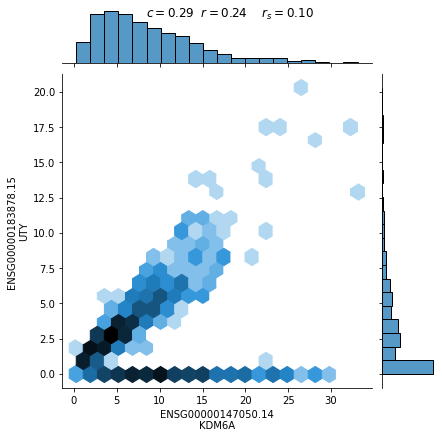

'Index: 1'

('ENSG00000115165.9', 'ENSG00000235750.9')

('CYTIP', 'KIAA0040')

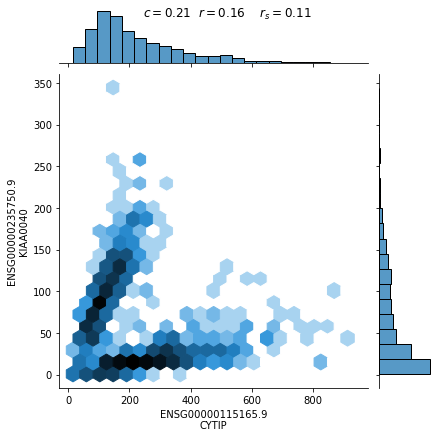

'Index: 2'

('ENSG00000115165.9', 'ENSG00000101265.15')

('CYTIP', 'RASSF2')

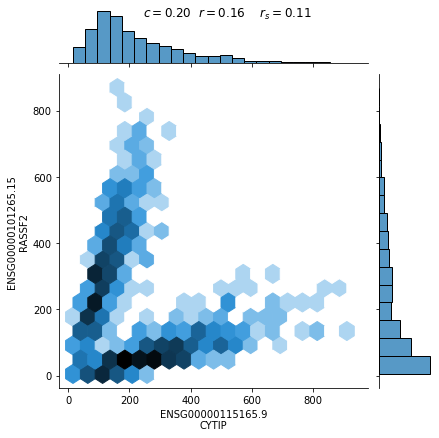

'Index: 3'

('ENSG00000198034.10', 'ENSG00000099725.14')

('RPS4X', 'PRKY')

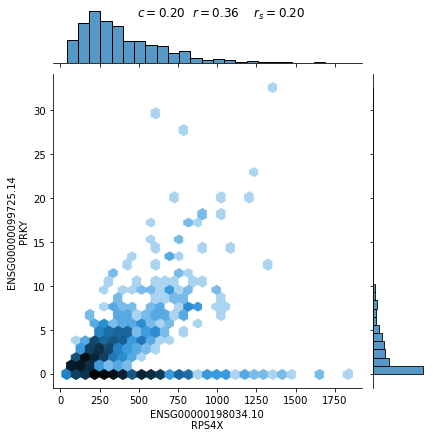

'Index: 4'

('ENSG00000147050.14', 'ENSG00000067048.16')

('KDM6A', 'DDX3Y')

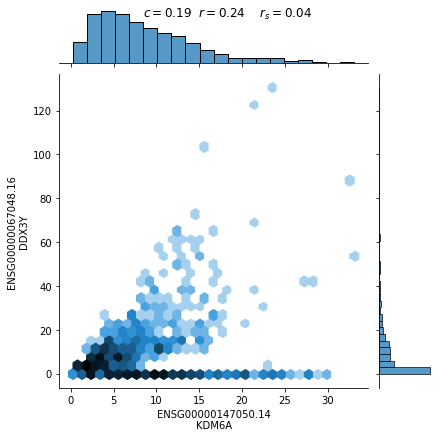

'Index: 5'

('ENSG00000137275.13', 'ENSG00000100226.15')

('RIPK1', 'GTPBP1')

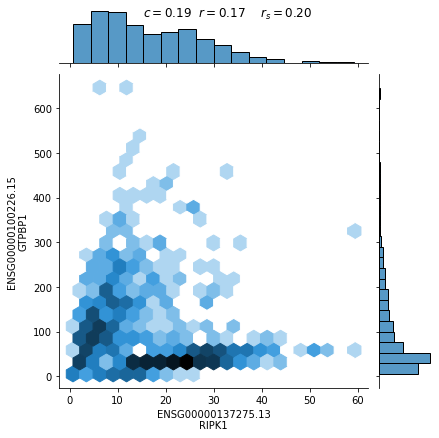

'Index: 6'

('ENSG00000064666.14', 'ENSG00000100226.15')

('CNN2', 'GTPBP1')

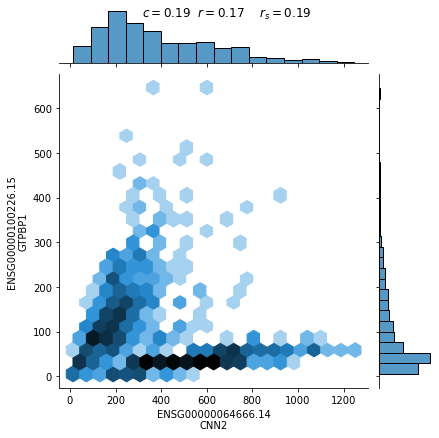

'Index: 7'

('ENSG00000107771.15', 'ENSG00000174151.14')

('CCSER2', 'CYB561D1')

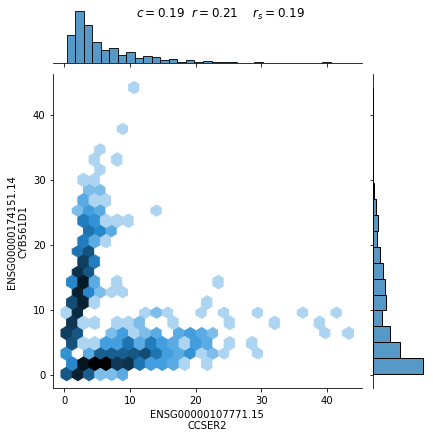

'Index: 8'

('ENSG00000196663.15', 'ENSG00000100226.15')

('TECPR2', 'GTPBP1')

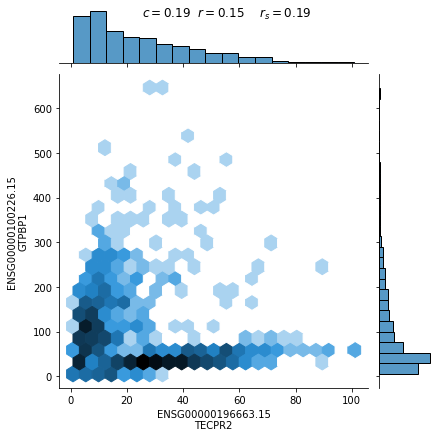

'Index: 9'

('ENSG00000167378.8', 'ENSG00000174151.14')

('IRGQ', 'CYB561D1')

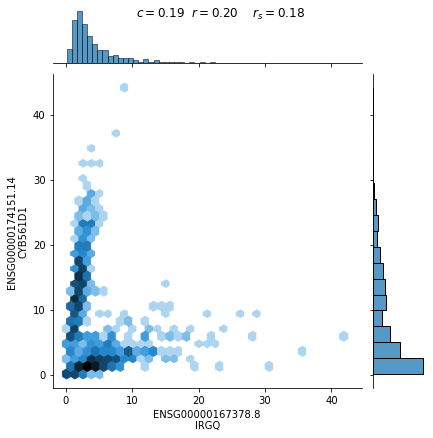

'Index: 10'

('ENSG00000115165.9', 'ENSG00000105514.7')

('CYTIP', 'RAB3D')

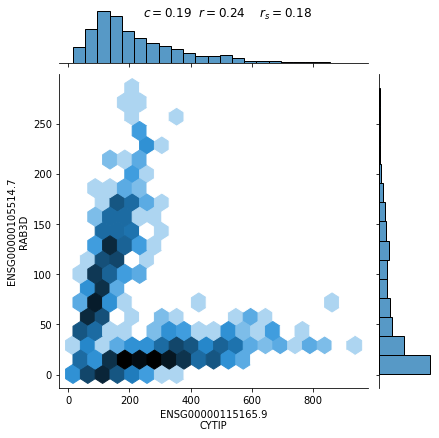

'Index: 11'

('ENSG00000255139.1', 'ENSG00000101265.15')

('AP000442.1', 'RASSF2')

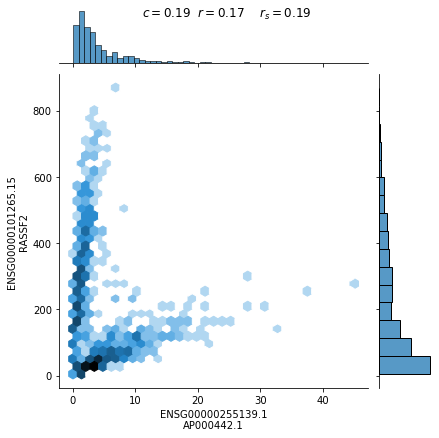

'Index: 12'

('ENSG00000115165.9', 'ENSG00000160785.13')

('CYTIP', 'SLC25A44')

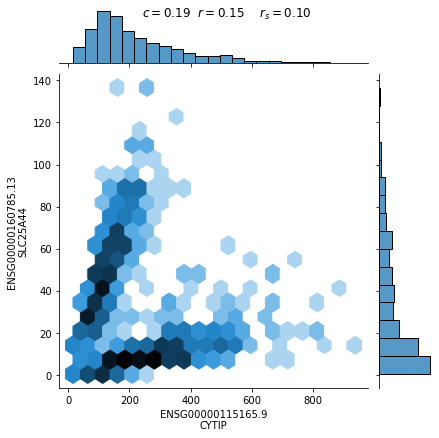

'Index: 13'

('ENSG00000115165.9', 'ENSG00000241878.11')

('CYTIP', 'PISD')

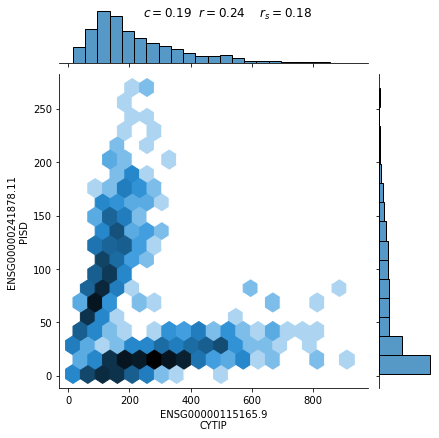

'Index: 14'

('ENSG00000140455.16', 'ENSG00000100226.15')

('USP3', 'GTPBP1')

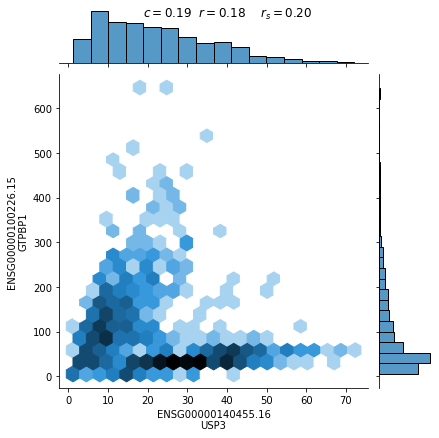

'Index: 15'

('ENSG00000142599.17', 'ENSG00000100226.15')

('RERE', 'GTPBP1')

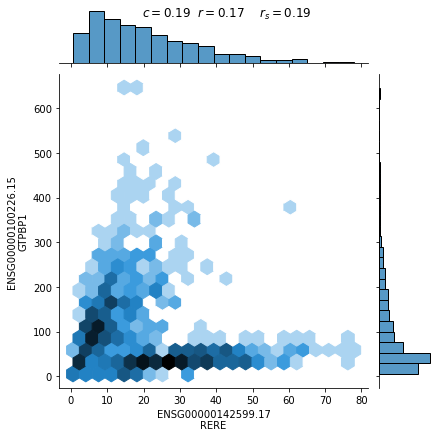

'Index: 16'

('ENSG00000171608.15', 'ENSG00000100226.15')

('PIK3CD', 'GTPBP1')

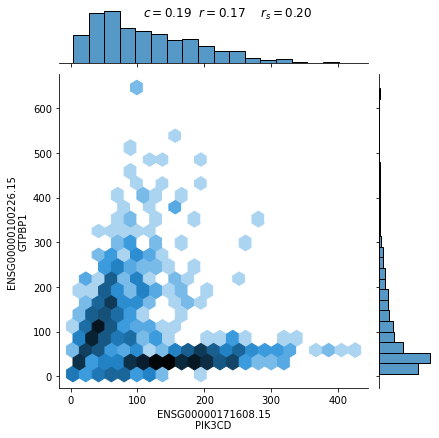

'Index: 17'

('ENSG00000107771.15', 'ENSG00000185905.3')

('CCSER2', 'C16orf54')

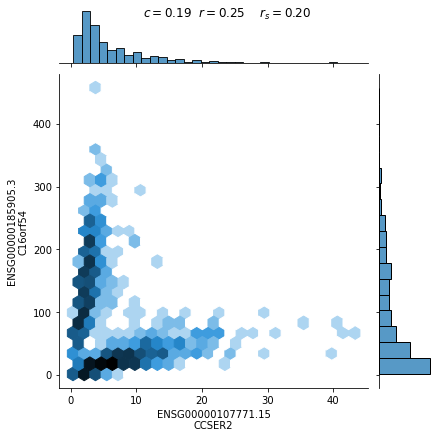

'Index: 18'

('ENSG00000115165.9', 'ENSG00000197324.8')

('CYTIP', 'LRP10')

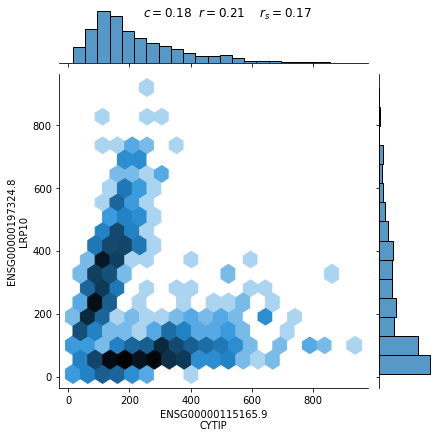

'Index: 19'

('ENSG00000129925.10', 'ENSG00000100226.15')

('TMEM8A', 'GTPBP1')

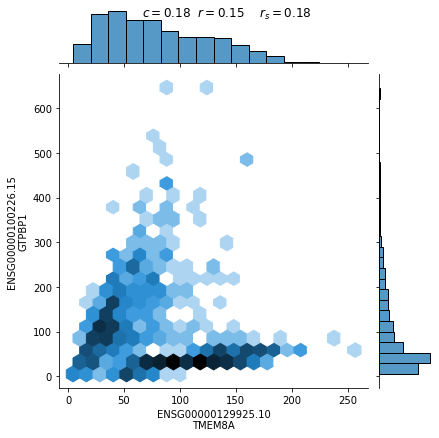

'Index: 20'

('ENSG00000059804.15', 'ENSG00000174125.7')

('SLC2A3', 'TLR1')

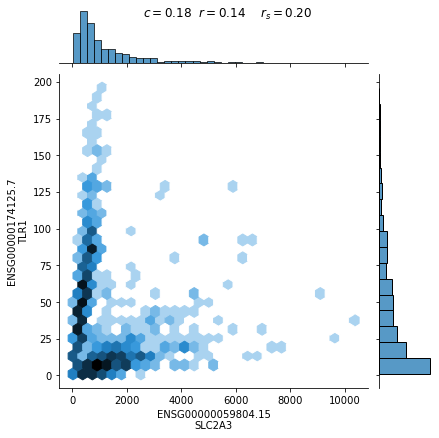

'Index: 21'

('ENSG00000167378.8', 'ENSG00000143412.9')

('IRGQ', 'ANXA9')

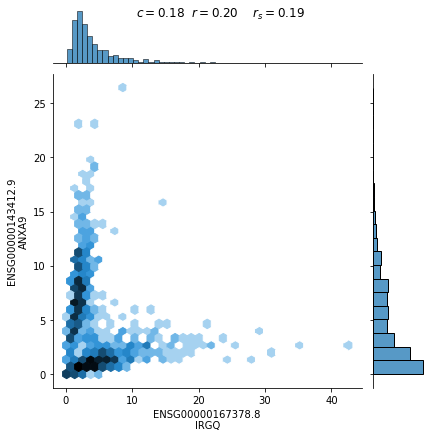

'Index: 22'

('ENSG00000110057.7', 'ENSG00000100226.15')

('UNC93B1', 'GTPBP1')

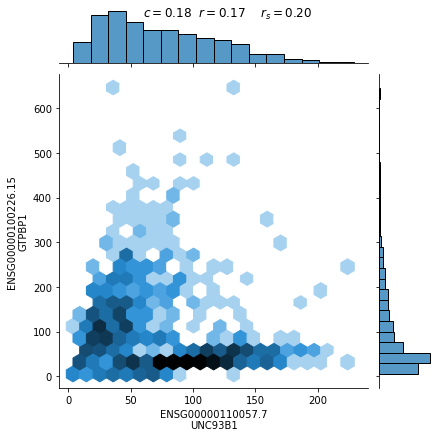

'Index: 23'

('ENSG00000198001.13', 'ENSG00000100226.15')

('IRAK4', 'GTPBP1')

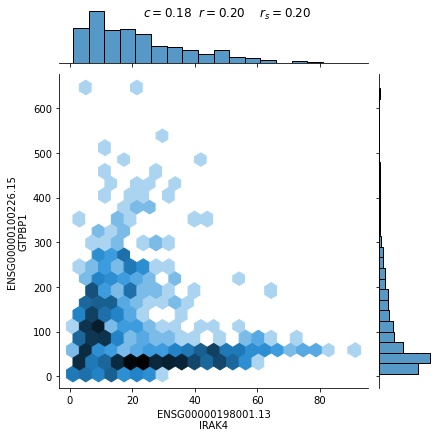

'Index: 24'

('ENSG00000205045.8', 'ENSG00000130772.13')

('SLFN12L', 'MED18')

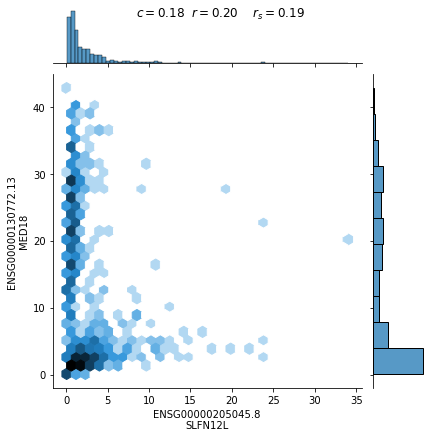

'Index: 25'

('ENSG00000005379.15', 'ENSG00000174151.14')

('TSPOAP1', 'CYB561D1')

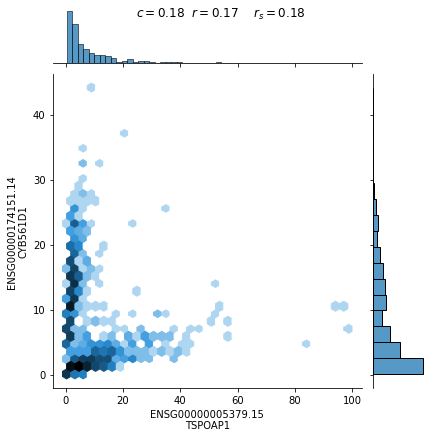

'Index: 26'

('ENSG00000168887.10', 'ENSG00000227782.2')

('C2orf68', 'CTC-529I10.2')

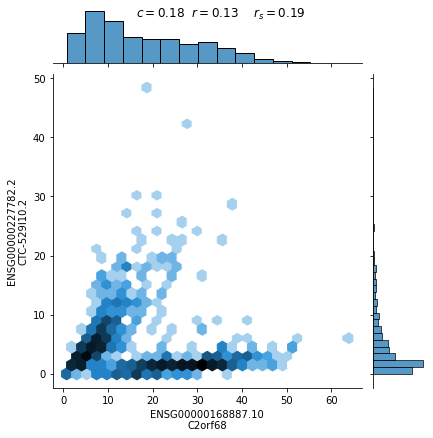

'Index: 27'

('ENSG00000107771.15', 'ENSG00000166272.16')

('CCSER2', 'WBP1L')

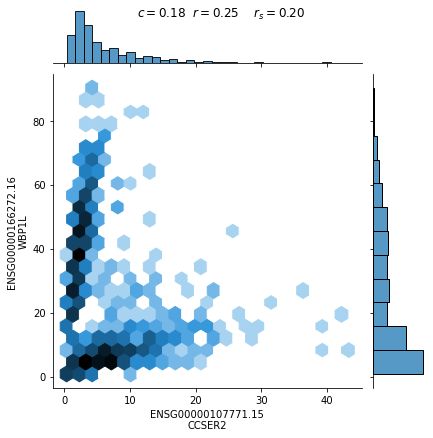

In [30]:
for i in range(min(_tmp_df.shape[0], 30)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_rs-KDM6A_vs_UTY.svg')

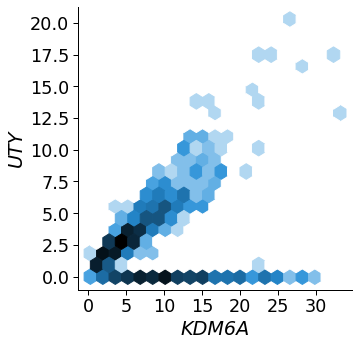

In [49]:
gene_pair_subset = "c_vs_rs"

gene0_id = "ENSG00000147050.14"
gene1_id = "ENSG00000183878.15"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_rs-CYTIP_vs_RASSF2.svg')

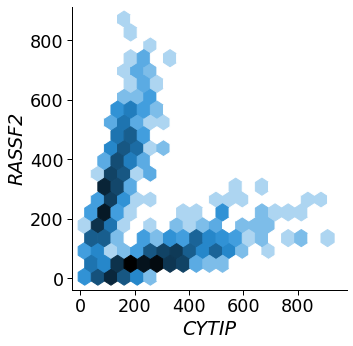

In [48]:
gene_pair_subset = "c_vs_rs"

gene0_id = "ENSG00000115165.9"
gene1_id = "ENSG00000101265.15"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Clustermatch vs Spearman/Pearson

In [32]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Spearman (low)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(8, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000101152.10,ENSG00000100226.15,0.193464,0.107576,0.156998,8979610.0,3482451.0,3018450.0
ENSG00000251474.6,ENSG00000229598.1,0.193464,0.073375,0.186682,8979610.0,2512718.0,3534806.0
ENSG00000189114.6,ENSG00000278330.1,0.188812,0.028556,0.192653,8897293.5,1043401.0,3636575.0
ENSG00000225963.7,ENSG00000229598.1,0.184279,0.070892,0.197203,8823932.0,2437032.0,3713281.0
ENSG00000100055.20,ENSG00000100226.15,0.184217,0.087254,0.183848,8813629.5,2922303.0,3486726.0
ENSG00000162413.16,ENSG00000235027.1,0.184217,0.062875,0.186421,8813629.5,2188393.0,3530425.0
ENSG00000125319.14,ENSG00000088325.15,0.183514,0.069207,0.134905,8802636.0,2385010.0,2621517.0
ENSG00000170871.11,ENSG00000229598.1,0.181940,0.067078,0.182466,8771662.0,2319153.0,3463190.0


### Preview

'Index: 0'

('ENSG00000101152.10', 'ENSG00000100226.15')

('DNAJC5', 'GTPBP1')

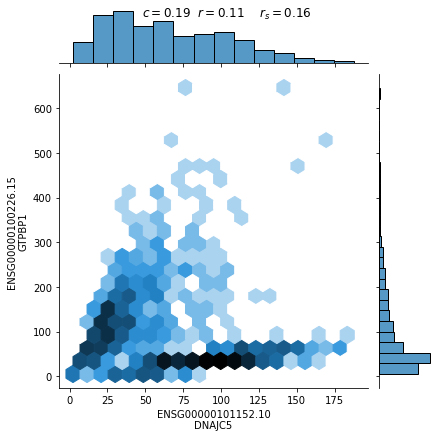

'Index: 1'

('ENSG00000251474.6', 'ENSG00000229598.1')

('RPL32P3', 'PRDX3P1')

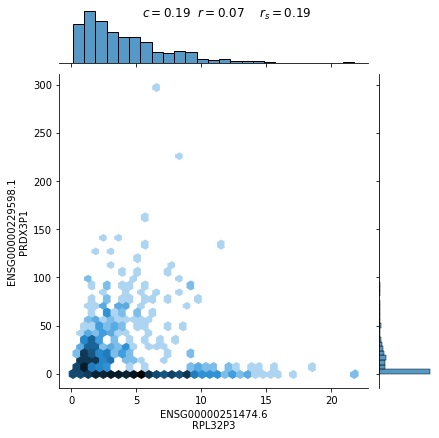

'Index: 2'

('ENSG00000189114.6', 'ENSG00000278330.1')

('BLOC1S3', 'RP11-4B16.4')

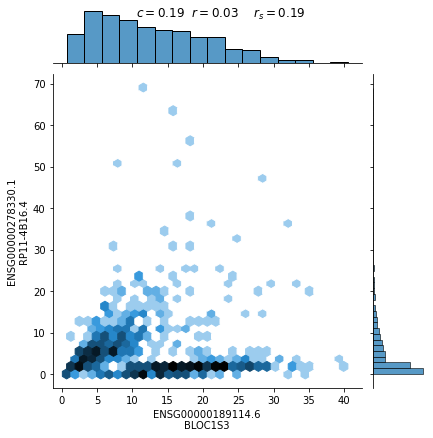

'Index: 3'

('ENSG00000225963.7', 'ENSG00000229598.1')

('AC009950.2', 'PRDX3P1')

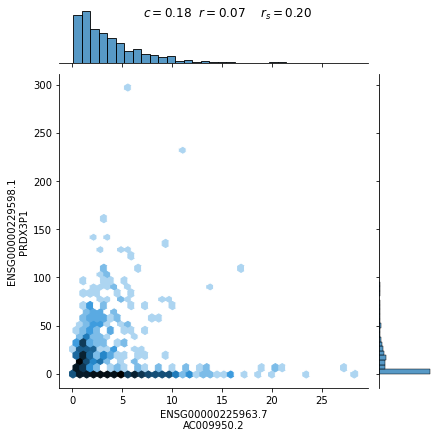

'Index: 4'

('ENSG00000100055.20', 'ENSG00000100226.15')

('CYTH4', 'GTPBP1')

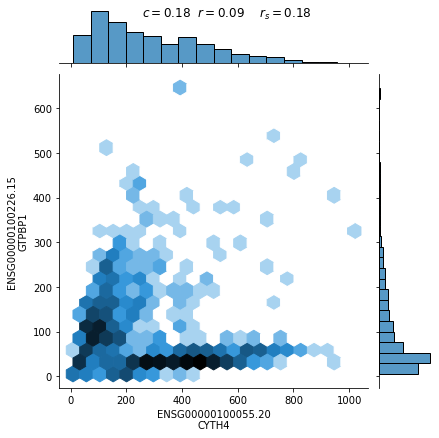

'Index: 5'

('ENSG00000162413.16', 'ENSG00000235027.1')

('KLHL21', 'AC068580.6')

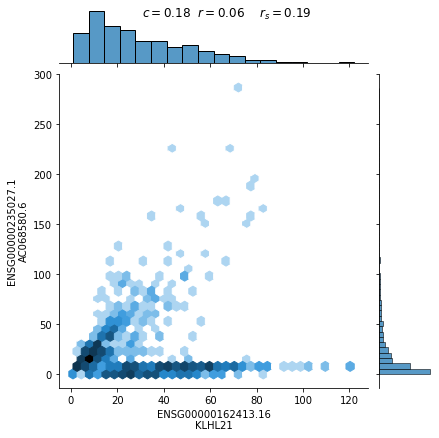

'Index: 6'

('ENSG00000125319.14', 'ENSG00000088325.15')

('C17orf53', 'TPX2')

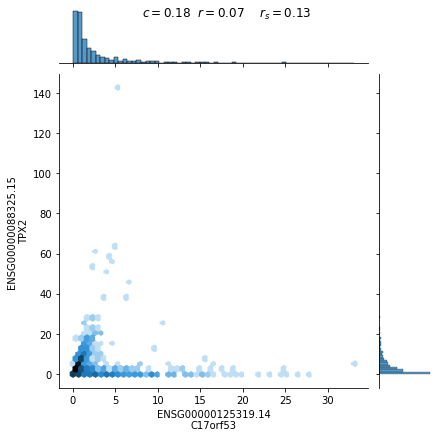

'Index: 7'

('ENSG00000170871.11', 'ENSG00000229598.1')

('KIAA0232', 'PRDX3P1')

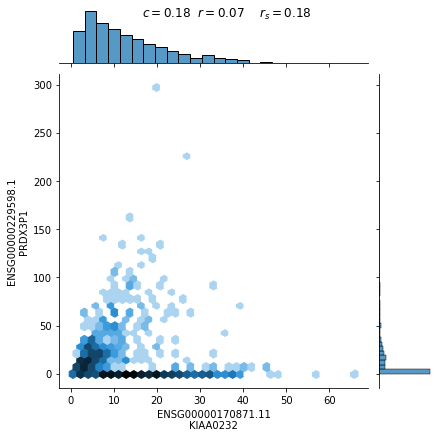

In [33]:
for i in range(min(_tmp_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_r_rs-KLHL21_vs_AC068580.6.svg')

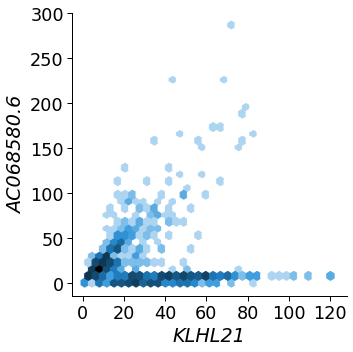

In [50]:
gene_pair_subset = "c_vs_r_rs"

gene0_id = "ENSG00000162413.16"
gene1_id = "ENSG00000235027.1"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Pearson vs Clustermatch

In [35]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Clustermatch (low)",
        "Pearson (high)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(1075, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000130598.15,ENSG00000177791.11,0.034593,0.967834,0.284206,3714425.5,12497377.0,5069769.0
ENSG00000086967.9,ENSG00000130598.15,0.034593,0.965012,0.314172,3714425.5,12497343.0,5504793.0
ENSG00000177791.11,ENSG00000068976.13,0.032751,0.964681,0.248365,3556384.0,12497334.0,4532919.0
ENSG00000086967.9,ENSG00000068976.13,0.032234,0.957893,0.234647,3499276.0,12497205.0,4320035.0
ENSG00000180209.11,ENSG00000068976.13,0.027118,0.955315,0.248569,2995235.0,12497111.0,4536023.0
...,...,...,...,...,...,...,...
ENSG00000275092.1,ENSG00000181800.5,0.020965,0.434911,0.232979,2274241.5,8750317.0,4293800.0
ENSG00000126368.5,ENSG00000092054.12,0.016958,0.434879,0.200617,1767851.5,8749987.0,3770183.0
ENSG00000081154.11,ENSG00000184205.14,0.033997,0.434810,0.317686,3665108.0,8749230.0,5555090.0
ENSG00000131013.3,ENSG00000255717.6,0.033879,0.434786,0.335524,3656275.0,8749003.0,5806190.0


### Preview

'Index: 0'

('ENSG00000130598.15', 'ENSG00000177791.11')

('TNNI2', 'MYOZ1')

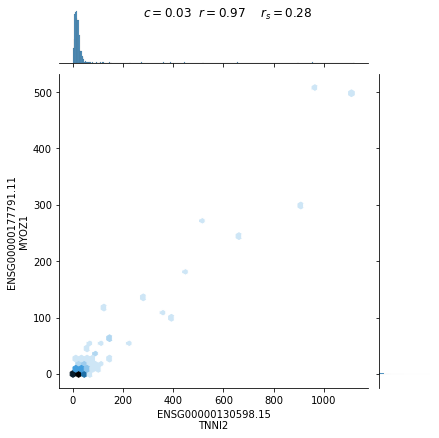

'Index: 1'

('ENSG00000086967.9', 'ENSG00000130598.15')

('MYBPC2', 'TNNI2')

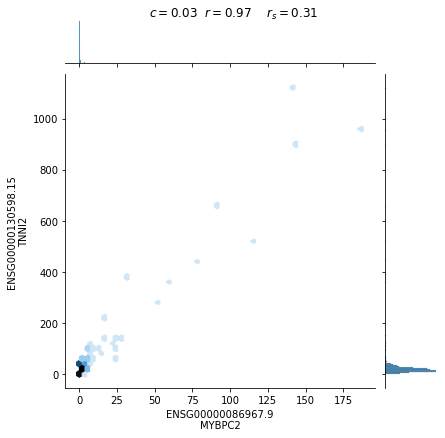

'Index: 2'

('ENSG00000177791.11', 'ENSG00000068976.13')

('MYOZ1', 'PYGM')

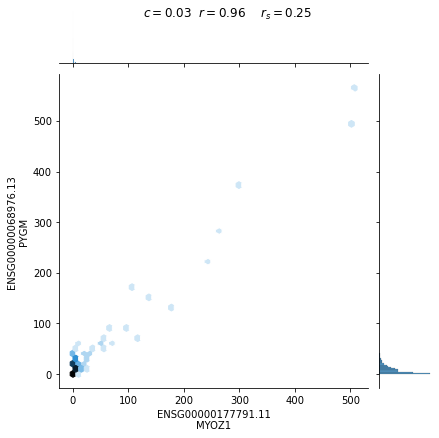

'Index: 3'

('ENSG00000086967.9', 'ENSG00000068976.13')

('MYBPC2', 'PYGM')

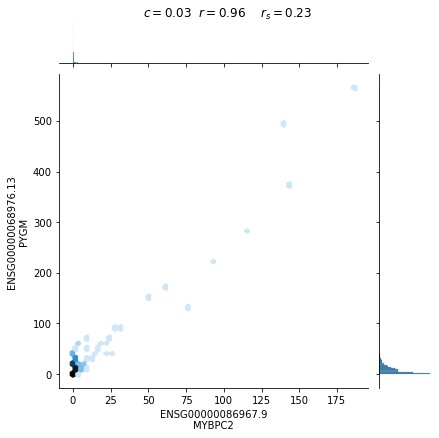

'Index: 4'

('ENSG00000180209.11', 'ENSG00000068976.13')

('MYLPF', 'PYGM')

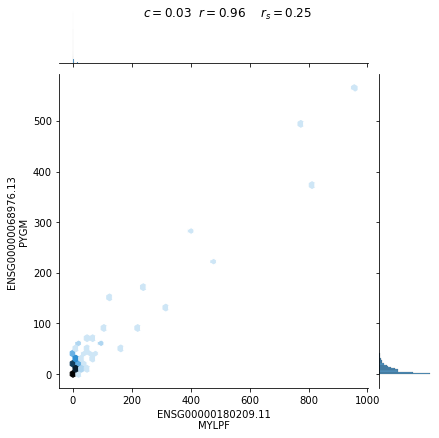

In [36]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-r_vs_c-TNNI2_vs_MYOZ1.svg')

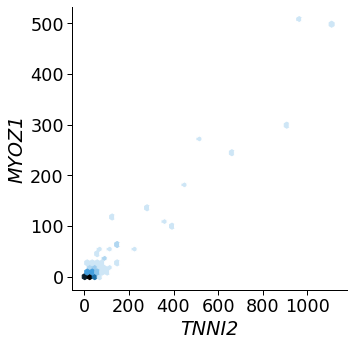

In [51]:
gene_pair_subset = "r_vs_c"

gene0_id = "ENSG00000130598.15"
gene1_id = "ENSG00000177791.11"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Pearson vs Spearman

In [38]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Spearman (low)",
        "Pearson (high)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(87, 6)

clustermatch   pearson  spearman  \
ENSG00000136235.15 ENSG00000133800.8       0.038197  0.923450  0.196694   
ENSG00000214274.9  ENSG00000110245.11      0.041971  0.783504  0.180828   
                   ENSG00000145321.12      0.039793  0.768642  0.154682   
                   ENSG00000130208.9       0.056221  0.732534  0.195886   
ENSG00000145192.12 ENSG00000214274.9       0.041971  0.716884  0.163153   
...                                             ...       ...       ...   
ENSG00000143772.9  ENSG00000090104.11      0.061686  0.437508  0.197910   
ENSG00000198178.10 ENSG00000281162.2       0.097293  0.436917  0.175440   
ENSG00000109606.12 ENSG00000269919.1       0.035931  0.436786  0.196683   
ENSG00000132424.14 ENSG00000090104.11      0.064704  0.436067  0.179254   
ENSG00000117091.9  ENSG00000110848.8       0.045345  0.435425  0.174842   

                                       clustermatch_rank  pearson_rank  \
ENSG00000136235.15 ENSG00000133800.8           4016168.5    12490926.0   
ENSG00000214274.9  ENSG00000110245.11          4303437.5    12030439.0   
                   ENSG00000145321.12          4141919.5    11931768.0   
                   ENSG00000130208.9           5185596.0    11661368.0   
ENSG00000145192.12 ENSG00000214274.9           4303437.5    11532036.0   
...                                                  ...           ...   
ENSG00000143772.9  ENSG00000090104.11          5468551.0     8777681.0   
ENSG00000198178.10 ENSG00000281162.2           6777340.0     8771485.0   
ENSG00000109606.12 ENSG00000269919.1           3835012.0     8770053.0   
ENSG00000132424.14 ENSG00000090104.11          5600878.0     8762484.0   
ENSG00000117091.9  ENSG00000110848.8           4552485.5     8755790.0   

                                       spearman_rank  
ENSG00000136235.15 ENSG00000133800.8       3704595.0  
ENSG00000214274.9  ENSG00000110245.11      3434813.0  
                   ENSG00000145321.12      2977733.0  
                   ENSG00000130208.9       3690995.0  
ENSG00000145192.12 ENSG00000214274.9       3127566.0  
...                                              ...  
ENSG00000143772.9  ENSG00000090104.11      3724918.0  
ENSG00000198178.10 ENSG00000281162.2       3341987.0  
ENSG00000109606.12 ENSG00000269919.1       3704391.0  
ENSG00000132424.14 ENSG00000090104.11      3407798.0  
ENSG00000117091.9  ENSG00000110848.8       3331485.0  

[87 rows x 6 columns]

### Preview

'Index: 0'

('ENSG00000136235.15', 'ENSG00000133800.8')

('GPNMB', 'LYVE1')

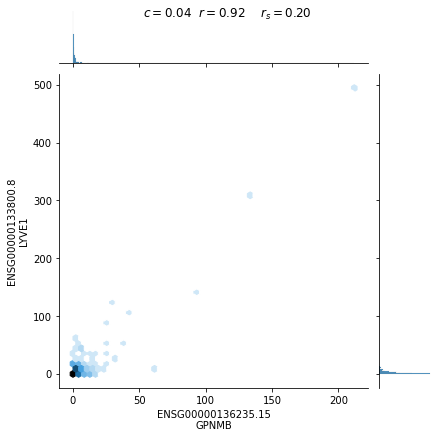

'Index: 1'

('ENSG00000214274.9', 'ENSG00000110245.11')

('ANG', 'APOC3')

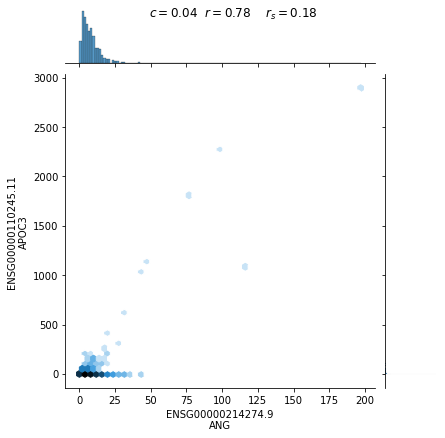

'Index: 2'

('ENSG00000214274.9', 'ENSG00000145321.12')

('ANG', 'GC')

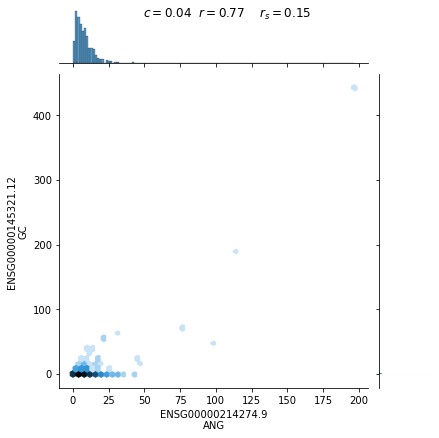

'Index: 3'

('ENSG00000214274.9', 'ENSG00000130208.9')

('ANG', 'APOC1')

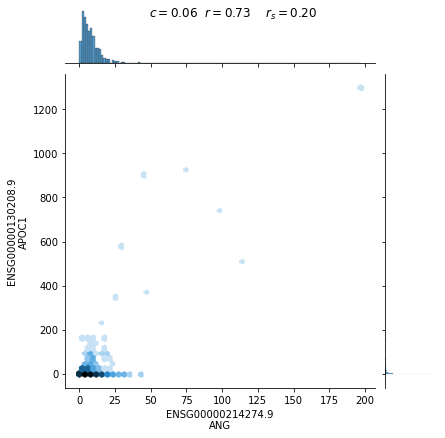

'Index: 4'

('ENSG00000145192.12', 'ENSG00000214274.9')

('AHSG', 'ANG')

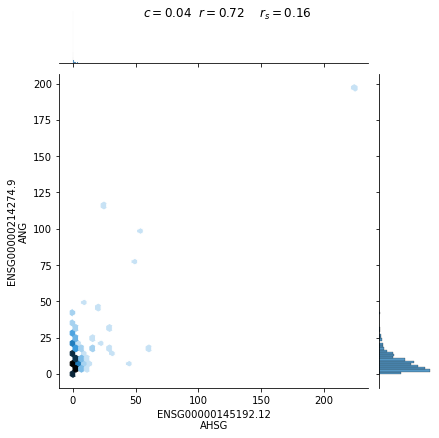

In [39]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

## Pearson vs Spearman/Clustermatch

In [40]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Clustermatch (low)",
        "Spearman (low)",
        "Pearson (high)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(531, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000115009.11,ENSG00000161055.3,0.031833,0.988292,0.187233,3471638.5,12497493.0,3544359.0
ENSG00000163739.4,ENSG00000161055.3,0.007038,0.975534,0.078267,457775.5,12497441.0,1561424.0
ENSG00000130598.15,ENSG00000198467.13,0.026588,0.948215,0.193457,2930710.0,12496755.0,3650290.0
ENSG00000198467.13,ENSG00000068976.13,0.034912,0.944430,0.029852,3745874.0,12496416.0,605603.0
ENSG00000171345.13,ENSG00000163739.4,0.008663,0.939751,0.097291,664617.0,12495782.0,1924833.0
...,...,...,...,...,...,...,...
ENSG00000162654.8,ENSG00000120217.13,0.025464,0.435255,0.004066,2812089.5,8753940.0,82556.0
ENSG00000155368.16,ENSG00000166741.7,0.007392,0.435169,0.027366,498828.5,8753081.0,555378.0
ENSG00000198892.6,ENSG00000198125.12,0.006197,0.435107,0.116825,354719.5,8752396.0,2290143.0
ENSG00000213639.9,ENSG00000121742.16,0.017215,0.435048,0.172672,1797227.5,8751751.0,3293830.0


### Preview

'Index: 0'

('ENSG00000115009.11', 'ENSG00000161055.3')

('CCL20', 'SCGB3A1')

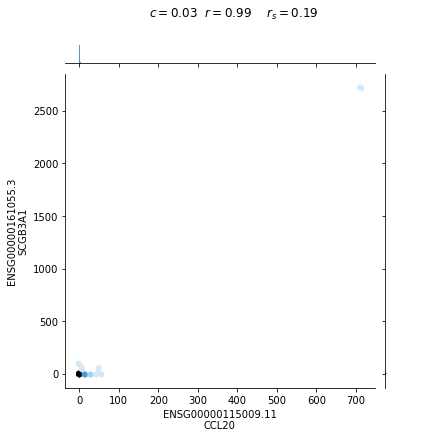

'Index: 1'

('ENSG00000163739.4', 'ENSG00000161055.3')

('CXCL1', 'SCGB3A1')

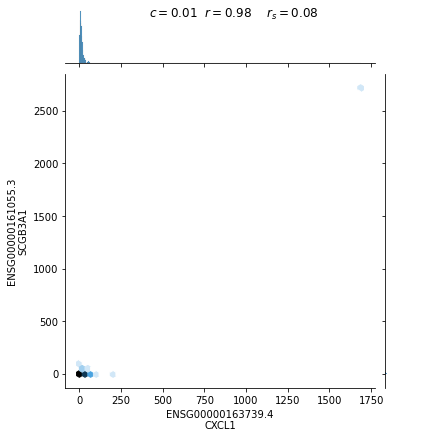

'Index: 2'

('ENSG00000130598.15', 'ENSG00000198467.13')

('TNNI2', 'TPM2')

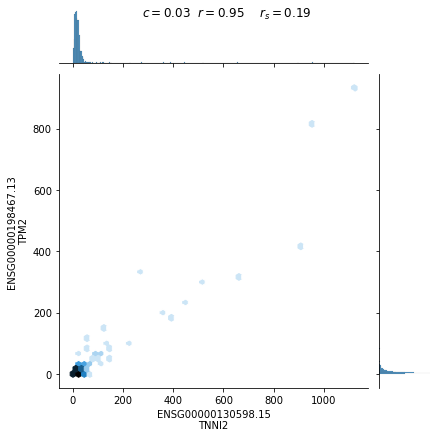

'Index: 3'

('ENSG00000198467.13', 'ENSG00000068976.13')

('TPM2', 'PYGM')

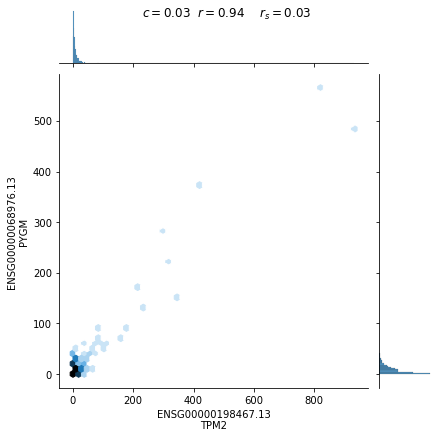

'Index: 4'

('ENSG00000171345.13', 'ENSG00000163739.4')

('KRT19', 'CXCL1')

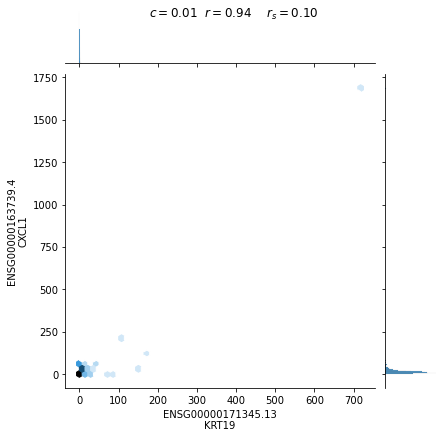

In [41]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-r_vs_c_rs-TPM2_vs_PYGM.svg')

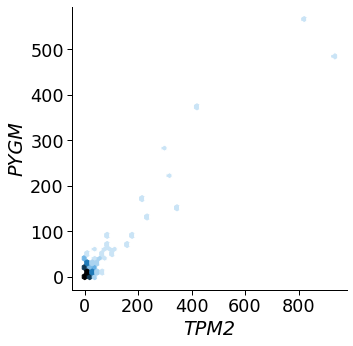

In [54]:
gene_pair_subset = "r_vs_c_rs"

gene0_id = "ENSG00000198467.13"
gene1_id = "ENSG00000068976.13"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Spearman vs Pearson

In [43]:
_tmp_df = get_gene_pairs(
    "spearman",
    {
        "Spearman (high)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(527, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000271178.1,ENSG00000211951.2,0.177429,0.102777,0.622770,8687458.5,3354069.0,9466282.0
ENSG00000116604.17,ENSG00000163739.4,0.179678,0.070643,0.620361,8729510.0,2429323.0,9437692.0
ENSG00000165272.14,ENSG00000211947.2,0.168576,0.102444,0.617566,8516910.5,3344965.0,9404603.0
ENSG00000165997.4,ENSG00000163739.4,0.159947,0.091025,0.617083,8343391.5,3029426.0,9398943.0
ENSG00000117632.22,ENSG00000211673.2,0.172974,0.101755,0.616314,8602668.0,3326113.0,9389809.0
...,...,...,...,...,...,...,...
ENSG00000127884.4,ENSG00000211749.1,0.170768,0.116364,0.562867,8559745.0,3711660.0,8749764.0
ENSG00000133321.10,ENSG00000211976.2,0.164233,0.057779,0.562815,8430572.5,2026490.0,8749167.0
ENSG00000145428.14,ENSG00000133800.8,0.153623,0.049136,0.562814,8211015.0,1746623.0,8749159.0
ENSG00000115866.10,ENSG00000139194.7,0.172974,0.079631,0.562781,8602668.0,2699737.0,8748721.0


### Preview

'Index: 0'

('ENSG00000271178.1', 'ENSG00000211951.2')

('IGHV3OR16-13', 'IGHV2-26')

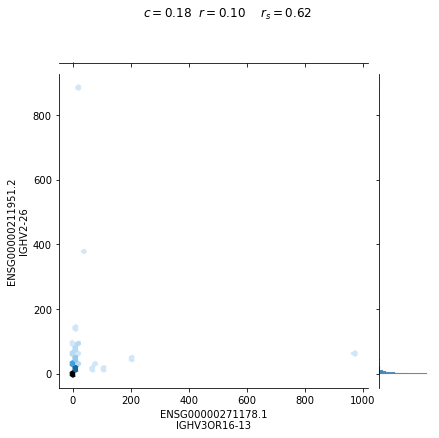

'Index: 1'

('ENSG00000116604.17', 'ENSG00000163739.4')

('MEF2D', 'CXCL1')

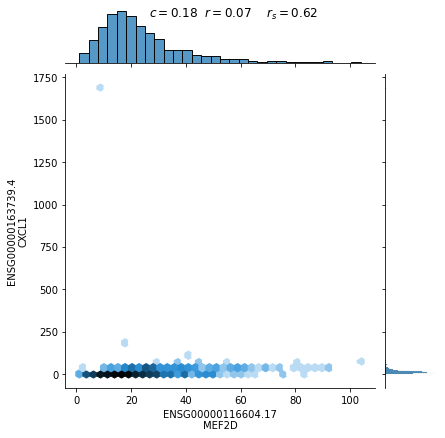

'Index: 2'

('ENSG00000165272.14', 'ENSG00000211947.2')

('AQP3', 'IGHV3-21')

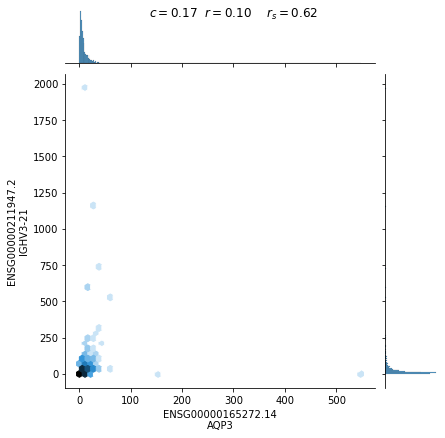

'Index: 3'

('ENSG00000165997.4', 'ENSG00000163739.4')

('ARL5B', 'CXCL1')

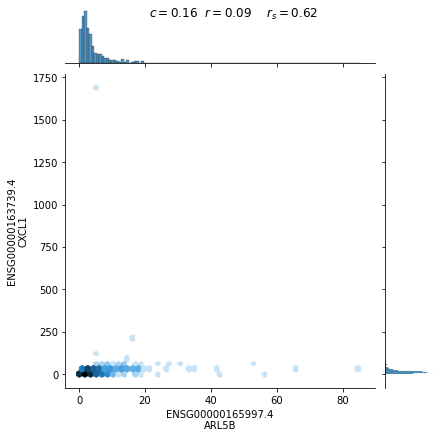

'Index: 4'

('ENSG00000117632.22', 'ENSG00000211673.2')

('STMN1', 'IGLV3-1')

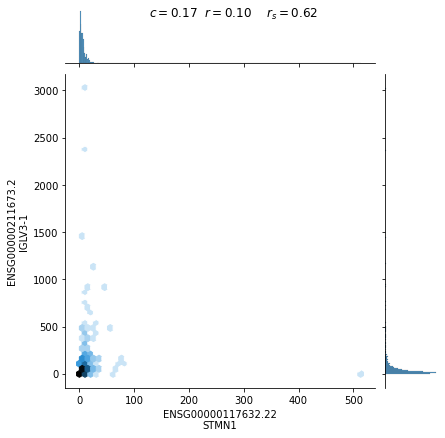

In [44]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection